In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import circlify
from pywaffle import Waffle

from tools.preprocess import load_datasets
plt.style.use('default')

In [2]:
DATA_DIR = '../data'

mushroom_train_path = f'{DATA_DIR}/raw/mushroom/*train.arff'
mushroom_test_path = f'{DATA_DIR}/raw/mushroom/*test.arff'
mushroom_train_dfs = load_datasets(mushroom_train_path)
mushroom_test_dfs = load_datasets(mushroom_test_path)

hepatitis_train_path = f'{DATA_DIR}/raw/hepatitis/*train.arff'
hepatitis_test_path = f'{DATA_DIR}/raw/hepatitis/*test.arff'
hepatitis_train_dfs = load_datasets(hepatitis_train_path)
hepatitis_test_dfs = load_datasets(hepatitis_test_path)

full_mushroom_df = pd.concat([mushroom_train_dfs[0], mushroom_test_dfs[0]])
full_hepatitis_df = pd.concat([hepatitis_train_dfs[0], hepatitis_test_dfs[0]])

full_hepatitis_df

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,50.0,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135.0,42.0,3.5,NaN,no,LIVE
1,45.0,male,no,no,yes,yes,no,yes,no,yes,no,no,no,1.0,85.0,75.0,NaN,NaN,no,LIVE
2,54.0,female,no,no,yes,yes,no,?,?,yes,no,yes,no,3.9,120.0,28.0,3.5,43.0,yes,DIE
3,35.0,female,no,no,yes,no,no,?,?,yes,yes,yes,no,1.5,138.0,58.0,2.6,NaN,yes,DIE
4,24.0,female,no,no,yes,no,no,yes,no,no,no,no,no,1.0,NaN,34.0,4.1,NaN,yes,LIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,38.0,female,no,yes,no,no,no,no,yes,no,no,no,no,0.7,70.0,28.0,4.2,62.0,no,LIVE
13,31.0,female,no,no,yes,yes,yes,yes,no,yes,no,no,no,8.0,NaN,101.0,2.2,NaN,yes,DIE
14,44.0,female,yes,no,yes,no,no,yes,yes,no,no,no,no,0.9,126.0,142.0,4.3,NaN,yes,LIVE
15,45.0,female,yes,yes,no,no,no,yes,no,no,no,no,no,1.3,85.0,44.0,4.2,85.0,yes,LIVE


In [3]:
hepatitis_die_count = len(full_hepatitis_df[full_hepatitis_df['Class'] == 'DIE'])
hepatitis_live_count = len(full_hepatitis_df[full_hepatitis_df['Class'] == 'LIVE'])
total_hepatitis_count = len(full_hepatitis_df)

mushroom_poisonous_count = len(full_mushroom_df[full_mushroom_df['class'] == 'p'])
mushroom_edible_count = len(full_mushroom_df[full_mushroom_df['class'] == 'e'])
total_mushroom_count = len(full_mushroom_df)

data = [{
    'id': 'All Data',
    'datum': total_hepatitis_count + total_mushroom_count,
    'children': [
        {
            'id': 'Mushrooms',
            'datum': total_mushroom_count,
            'children': [
                {'id': 'Edible', 'datum': mushroom_edible_count},
                {'id': 'Poisonous', 'datum': mushroom_poisonous_count}
            ]
        },
        {
            'id': 'Hepatitis',
            'datum': total_hepatitis_count,
            'children': [
                {'id': 'Live', 'datum': hepatitis_live_count},
                {'id': 'Die', 'datum': hepatitis_die_count}
            ]
        }
    ]
}]

In [4]:
# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
print(circles[1].ex['datum'])


155


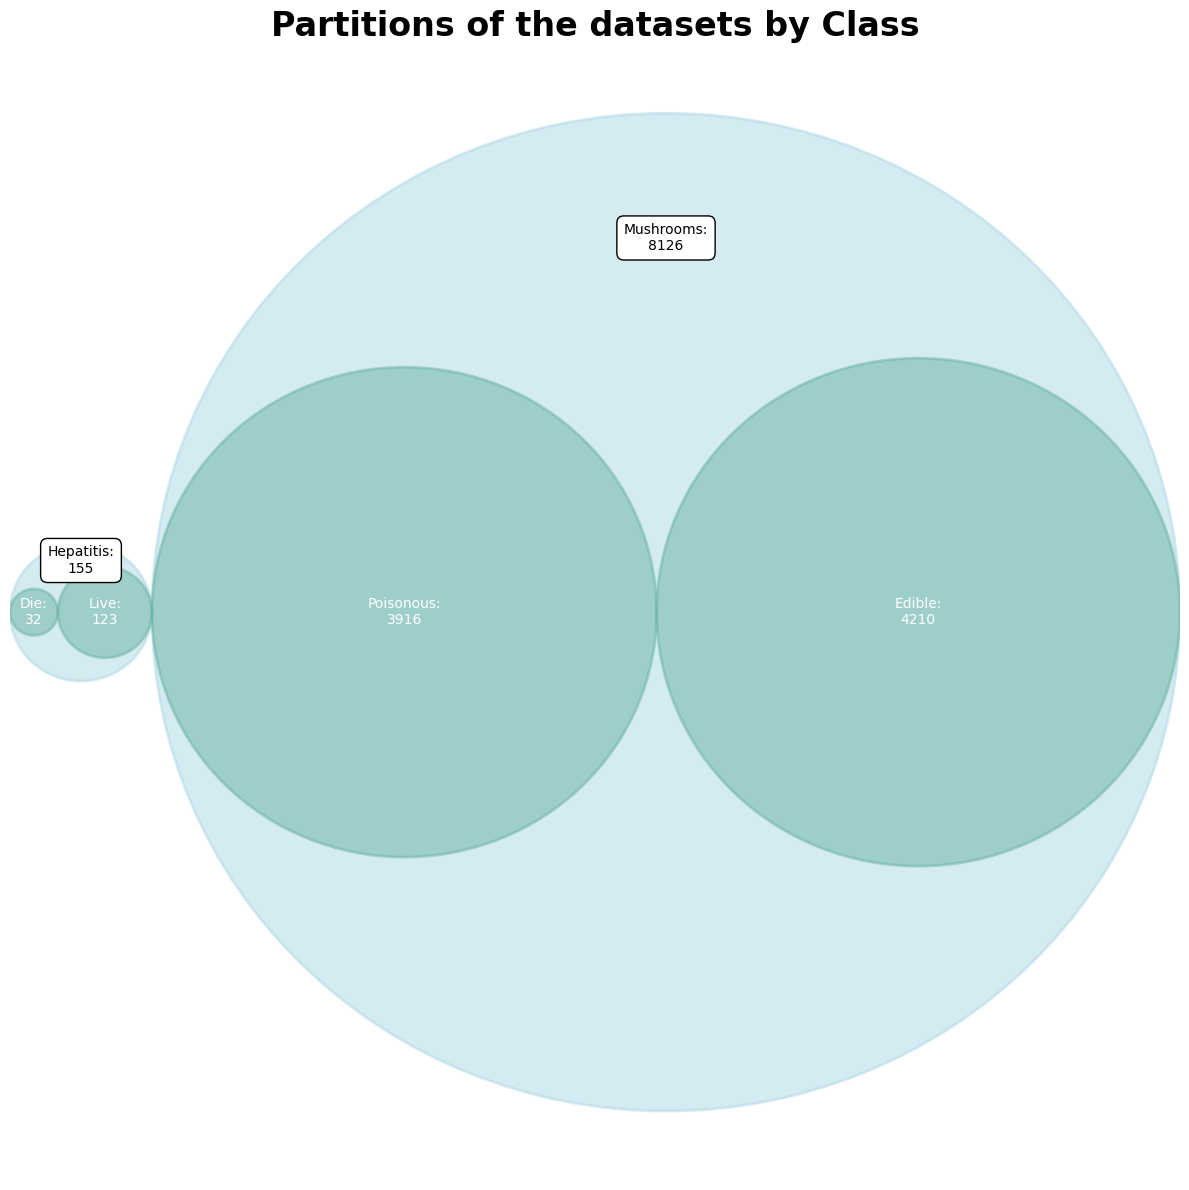

In [5]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(12, 12))

# Title
ax.set_title('Partitions of the datasets by Class', fontsize=24, fontweight='bold')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (Datasets):
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                 linewidth=2, color="lightblue"))

# Print circle and labels for the lowest level (Classes):
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = f"{circle.ex['id']}:\n{circle.ex['datum']}"
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                 linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x, y), ha='center', va='center', color="white")

# Print labels for the highest level (Datasets):
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    label = f"{circle.ex['id']}:\n{circle.ex['datum']}"
    plt.annotate(label, (x, y + 3*r/4), va='center', ha='center', bbox=dict(
        facecolor='white', edgecolor='black', boxstyle='round', pad=.5))
    
plt.tight_layout()
fig.savefig('../reports/figures/dataset-partitions.png', dpi=300)

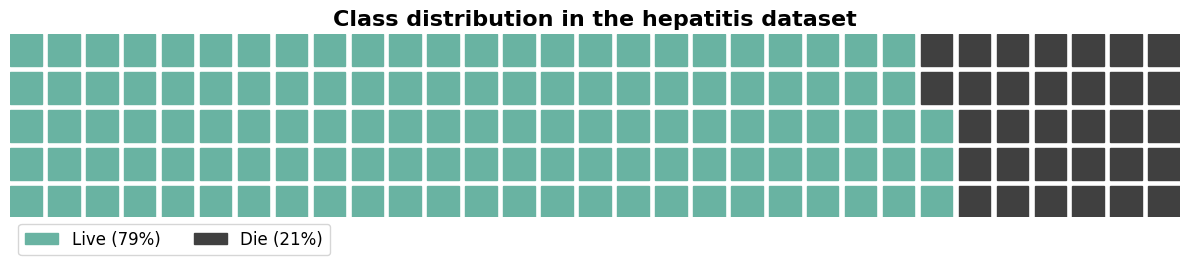

In [6]:
data = {'Live': hepatitis_live_count, 'Die': hepatitis_die_count}

# Repartition 
repartition = [f"{k} ({round(v / sum(data.values()) * 100)}%)" for k, v in data.items()]

# Make the chart
fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12, 3),
    rows=5,
    columns=31,
    values=data,
    colors=("#69b3a2", "#404040"),
    title={
        'label': 'Class distribution in the hepatitis dataset',
        'fontdict': {
            'fontsize': 16,
            'fontweight': 'bold'
        }
    },
    labels=repartition,
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.25), # position of the legend
        'ncol': len(data), # number of columns in the legend
        'fontsize': 12, #size of the legend
    }
)
plt.tight_layout()
fig.savefig('../reports/figures/hepatitis-class-distribution.png', dpi=300)


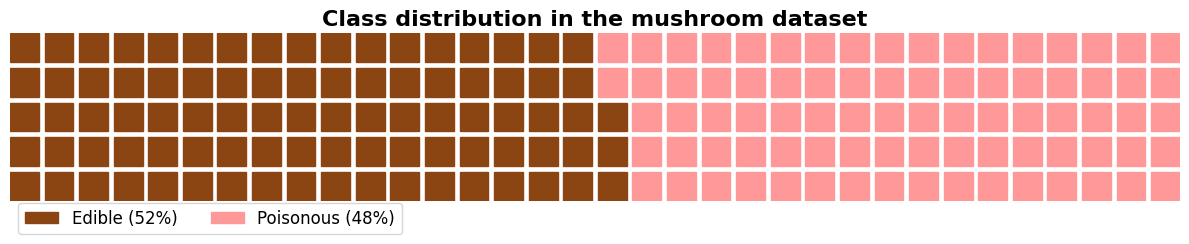

In [7]:
data = {'Edible': mushroom_edible_count, 'Poisonous': mushroom_poisonous_count}

# Repartition 
repartition = [f"{k} ({round(v / sum(data.values()) * 100)}%)" for k, v in data.items()]

# Make the chart
fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12, 3),
    rows=5,
    columns=34,
    values=data,
    colors=("#8B4513", "#FF9999"),
    title={
        'label': 'Class distribution in the mushroom dataset',
        'fontdict': {
            'fontsize': 16,
            'fontweight': 'bold'
        }
    },
    labels=repartition,
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.25), # position of the legend
        'ncol': len(data), # number of columns in the legend
        'fontsize': 12, #size of the legend
    }
)
plt.tight_layout()
fig.savefig('../reports/figures/mushroom-class-distribution.png', dpi=300)
